## Defining the max-cut problem

In [74]:
from collections import defaultdict

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from matplotlib import pyplot as plt
import networkx as nx

In [75]:
G = nx.Graph()
edges = [
    (1, 2), (1, 3), (1, 4), (1, 5),
    (2, 3), (2, 6), (2, 7),
    (3, 4), (3, 8),
    (4, 5), (4, 9), (4, 10),
    (5, 10),
    (6, 7), (6, 11), (6, 12),
    (7, 8), (7, 13),
    (8, 9), (8, 14),
    (9, 10), (9, 15),
    (10, 16),
    (11, 12), (11, 17),
    (12, 13), (12, 18),
    (13, 14), (13, 19),
    (14, 15), (14, 20),
    (15, 16), (15, 21),
    (16, 22),
    (17, 18), (18, 19), (19, 20), (20, 21), (21, 22)
]

G.add_edges_from(edges)
print(f"The graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

The graph has 22 nodes and 39 edges.


In [76]:
Q = defaultdict(int)
for i, j in G.edges:
    Q[(i,i)]+= -1
    Q[(j,j)]+= -1
    Q[(i,j)]+= 2

In [77]:
sampler = EmbeddingComposite(DWaveSampler())
response = sampler.sample_qubo(Q,
                               chain_strength=8,
                               num_reads=10,
                               label='Example - Maximum Cut')

------------------------------------------------------------------------------------------------------------------------
                                        Set 0                                        Set 1    Energy        Cut Size    
------------------------------------------------------------------------------------------------------------------------
  [1, 2, 4, 6, 8, 10, 11, 13, 15, 18, 20, 22]         [3, 5, 7, 9, 12, 14, 16, 17, 19, 21]     -34.0           34       


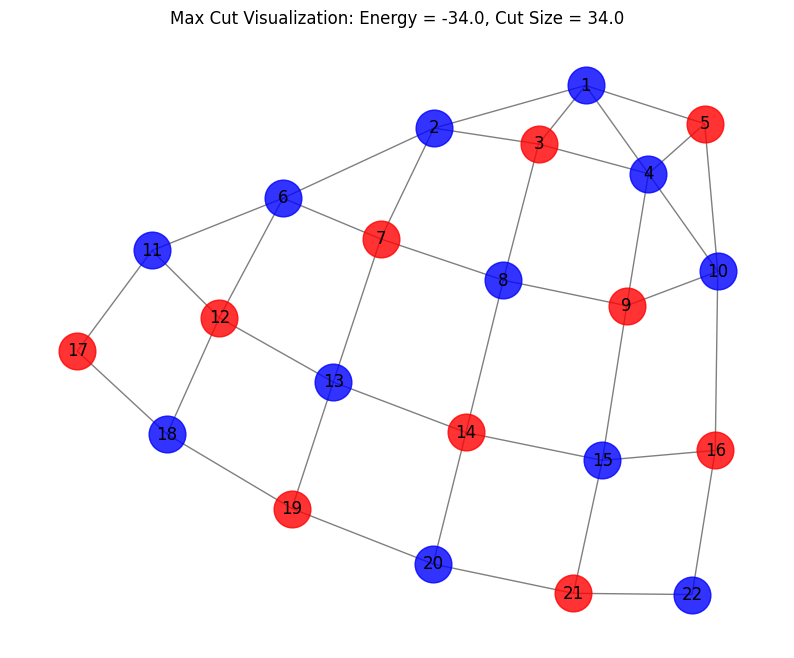

In [78]:
print('-' * 120)
print('{:>45s}{:>45s}{:^15s}{:^15s}'.format('Set 0', 'Set 1', 'Energy', 'Cut Size'))
print('-' * 120)

pos = nx.spring_layout(G)

for sample, E in response.data(fields=['sample', 'energy']):
    S0 = [k for k, v in sample.items() if v == 0]
    S1 = [k for k, v in sample.items() if v == 1]
    print('{:>45s}{:>45s}{:^15s}{:^15s}'.format(str(S0), str(S1), str(E), str(int(-1*E))))

    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, nodelist=S0, node_color='blue', node_size=700, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=S1, node_color='red', node_size=700, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

    plt.title(f'Max Cut Visualization: Energy = {E}, Cut Size = {-1*E}')
    plt.axis('off')
    plt.show()
    break 